# **Visualization**

In [26]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import json

import sys,os

SUMO_HOME = os.environ["SUMO_HOME"] #locating the simulator
sys.path.append(SUMO_HOME+"/tools")
import sumolib
from sumolib.visualization import helpers

In [36]:
class Option:
    #default options required by sumolib.visualization
    defaultWidth = 1.5
    defaultColor = (0.0, 0.0, 0.0, 0.0)

def plot_network_probs(net, probabilities, index_to_edge_map, cmap="YlGn",
                      title="", special_edges=None, alpha=1.0):

    '''
        Plots a road network with edges colored according to a probabilistic distribution.
        Parameters:
            net: a sumolib road network
            probabilities: a dictionary that maps edge indices to probabilities
                If an edge is not in this map, it will get a default (light gray) color.
            index_to_edge_map: a dictionary that maps edge indices to SUMO edge IDs
            cmap: the colormap to be used on the plot
            title: title of the produced plot
            special_edges: edges to be plotted with special color, given in a similar structure
                as probabilities parameter

        Returns:
            a figure and axis object
    '''
        
    scalar_map = None
    colors = {}
    options = Option()
    if probabilities is None:
        for e in index_to_edge_map.values():
            colors[e] = (0.125, 0.125, 0.125, .25)
    else:
        c_norm = matplotlib.colors.LogNorm(vmin=min(probabilities)*0.85, vmax=max(probabilities)*1.15)
        scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
        for i,p in enumerate(probabilities):
            if (p == 0.0) and (i in index_to_edge_map):
                colors[index_to_edge_map[i]] = (0.125, 0.125, .125, .125)
            elif i in index_to_edge_map:
                colors[index_to_edge_map[i]] = scalar_map.to_rgba(min(1,max(0,p)))
    
    if not(special_edges is None):
        for ind in special_edges:
            colors[index_to_edge_map[ind]] = (1., 0, 0, alpha)
    
    fig, ax = plt.subplots(figsize=(22, 20))
    helpers.plotNet(net, colors, [], options)
    plt.title(title)
    plt.xlabel("position [m]")
    plt.ylabel("position [m]")
    ax.set_facecolor("lightgray")
    if not(scalar_map is None):
        plt.colorbar(scalar_map)

    return fig, ax

## **Visualizing parking lots**

In [ ]:
with open("../02_data/proximity.json", "r") as f:
    proximity = json.load(f)
    
with open("../02_data/edge_maps.json", "r") as f:
    edge_map = json.load(f)
    idx_to_edge_map = edge_map["idx_to_edge_map"]
    edge_to_idx_map = edge_map["edge_to_idx_map"]

In [30]:
parking_df = pd.read_xml("../build_inputs/MoSTScenario/scenario/in/add/most.parking.add.xml")
parking_df = parking_df[parking_df["roadsideCapacity"]>0]

In [31]:
parking_df.head()

,id,lane,startPos,endPos,roadsideCapacity,friendlyPos,edges,interval
0,1059,-153419_1,10.000000,20.000000,225.0,true,None,NaN
1,1060,-152335_1,18.191499,28.191499,75.0,true,None,NaN
2,1061,153427#0_1,10.000000,20.000000,350.0,true,None,NaN
3,1062,-153427#5_1,10.583918,20.583918,350.0,true,None,NaN
4,1063,153547_1,37.879874,47.879874,50.0,true,None,NaN


In [32]:
parking_encoded = []
for i,r in parking_df.iterrows():
    edge = r.lane.split("_")[0]
    parking_encoded.append(str(edge_to_idx_map[edge]))

In [34]:
net = sumolib.net.readNet("../build_inputs/MoSTScenario/scenario/in/most.net.xml")

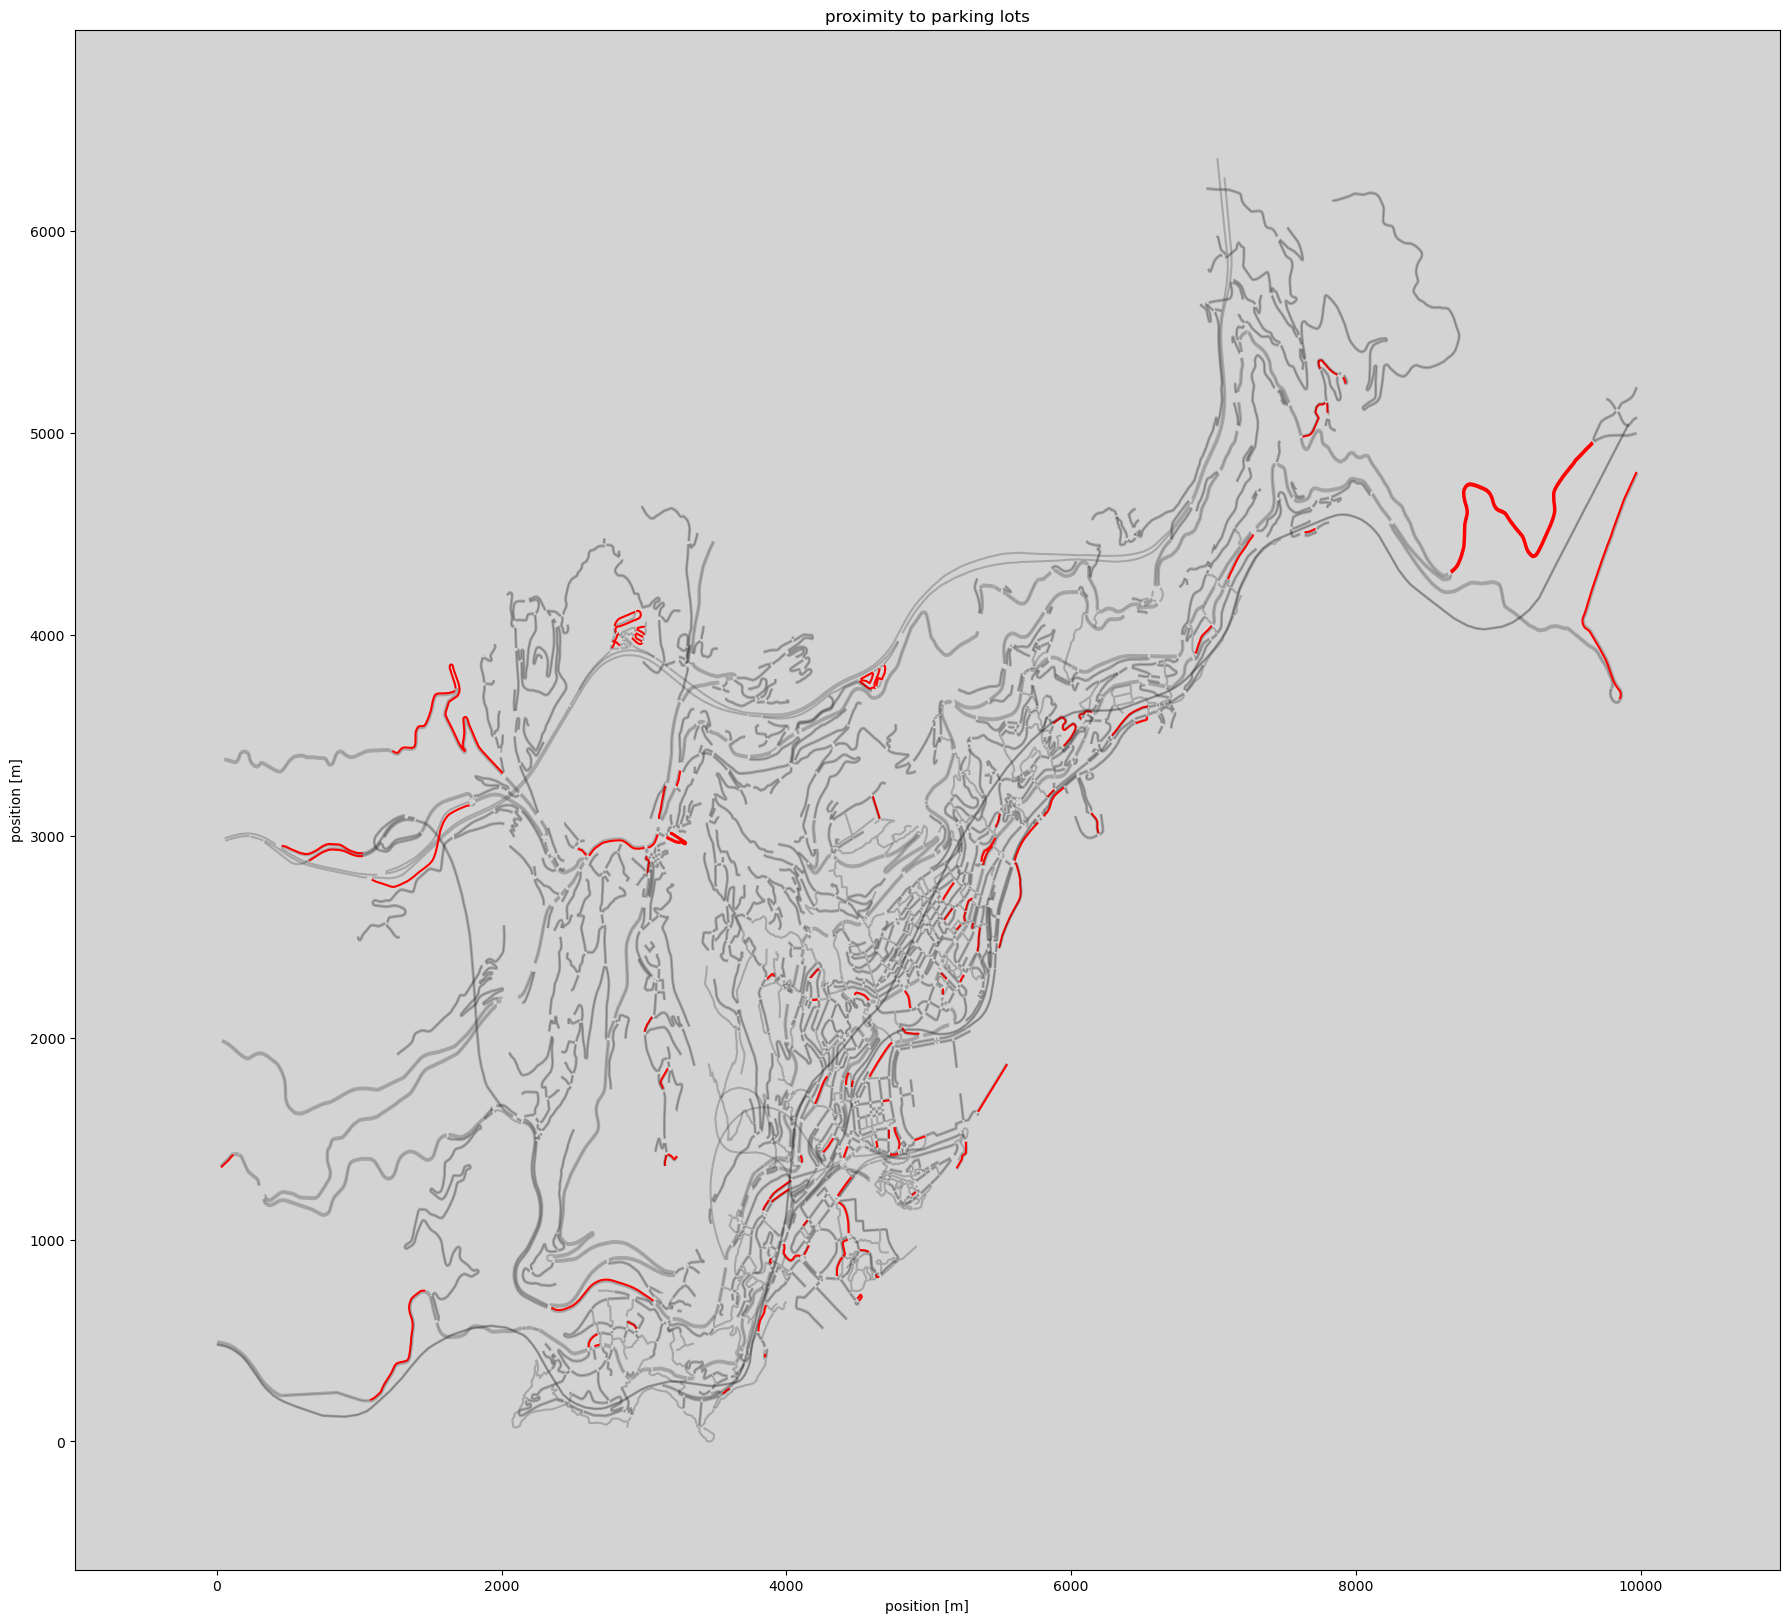

In [35]:
fig, ax = plot_network_probs(net, None, idx_to_edge_map, title="proximity to parking lots",
                             special_edges=parking_encoded)
fig.show()

## **Visualizing edges in proximity of the parking lots**

In [39]:
with open("../02_data/proximity2.json", "r") as f:
    proximity = json.load(f)
    
with open("../02_data/edge_maps.json", "r") as f:
    edge_map = json.load(f)
    idx_to_edge_map = edge_map["idx_to_edge_map"]
    edge_to_idx_map = edge_map["edge_to_idx_map"]

In [40]:
proximity_encoded = []
for p in proximity:
    for edge in proximity[p]:
        proximity_encoded.append(str(edge_to_idx_map[edge]))

In [41]:
net = sumolib.net.readNet("../build_inputs/MoSTScenario/scenario/in/most.net.xml")

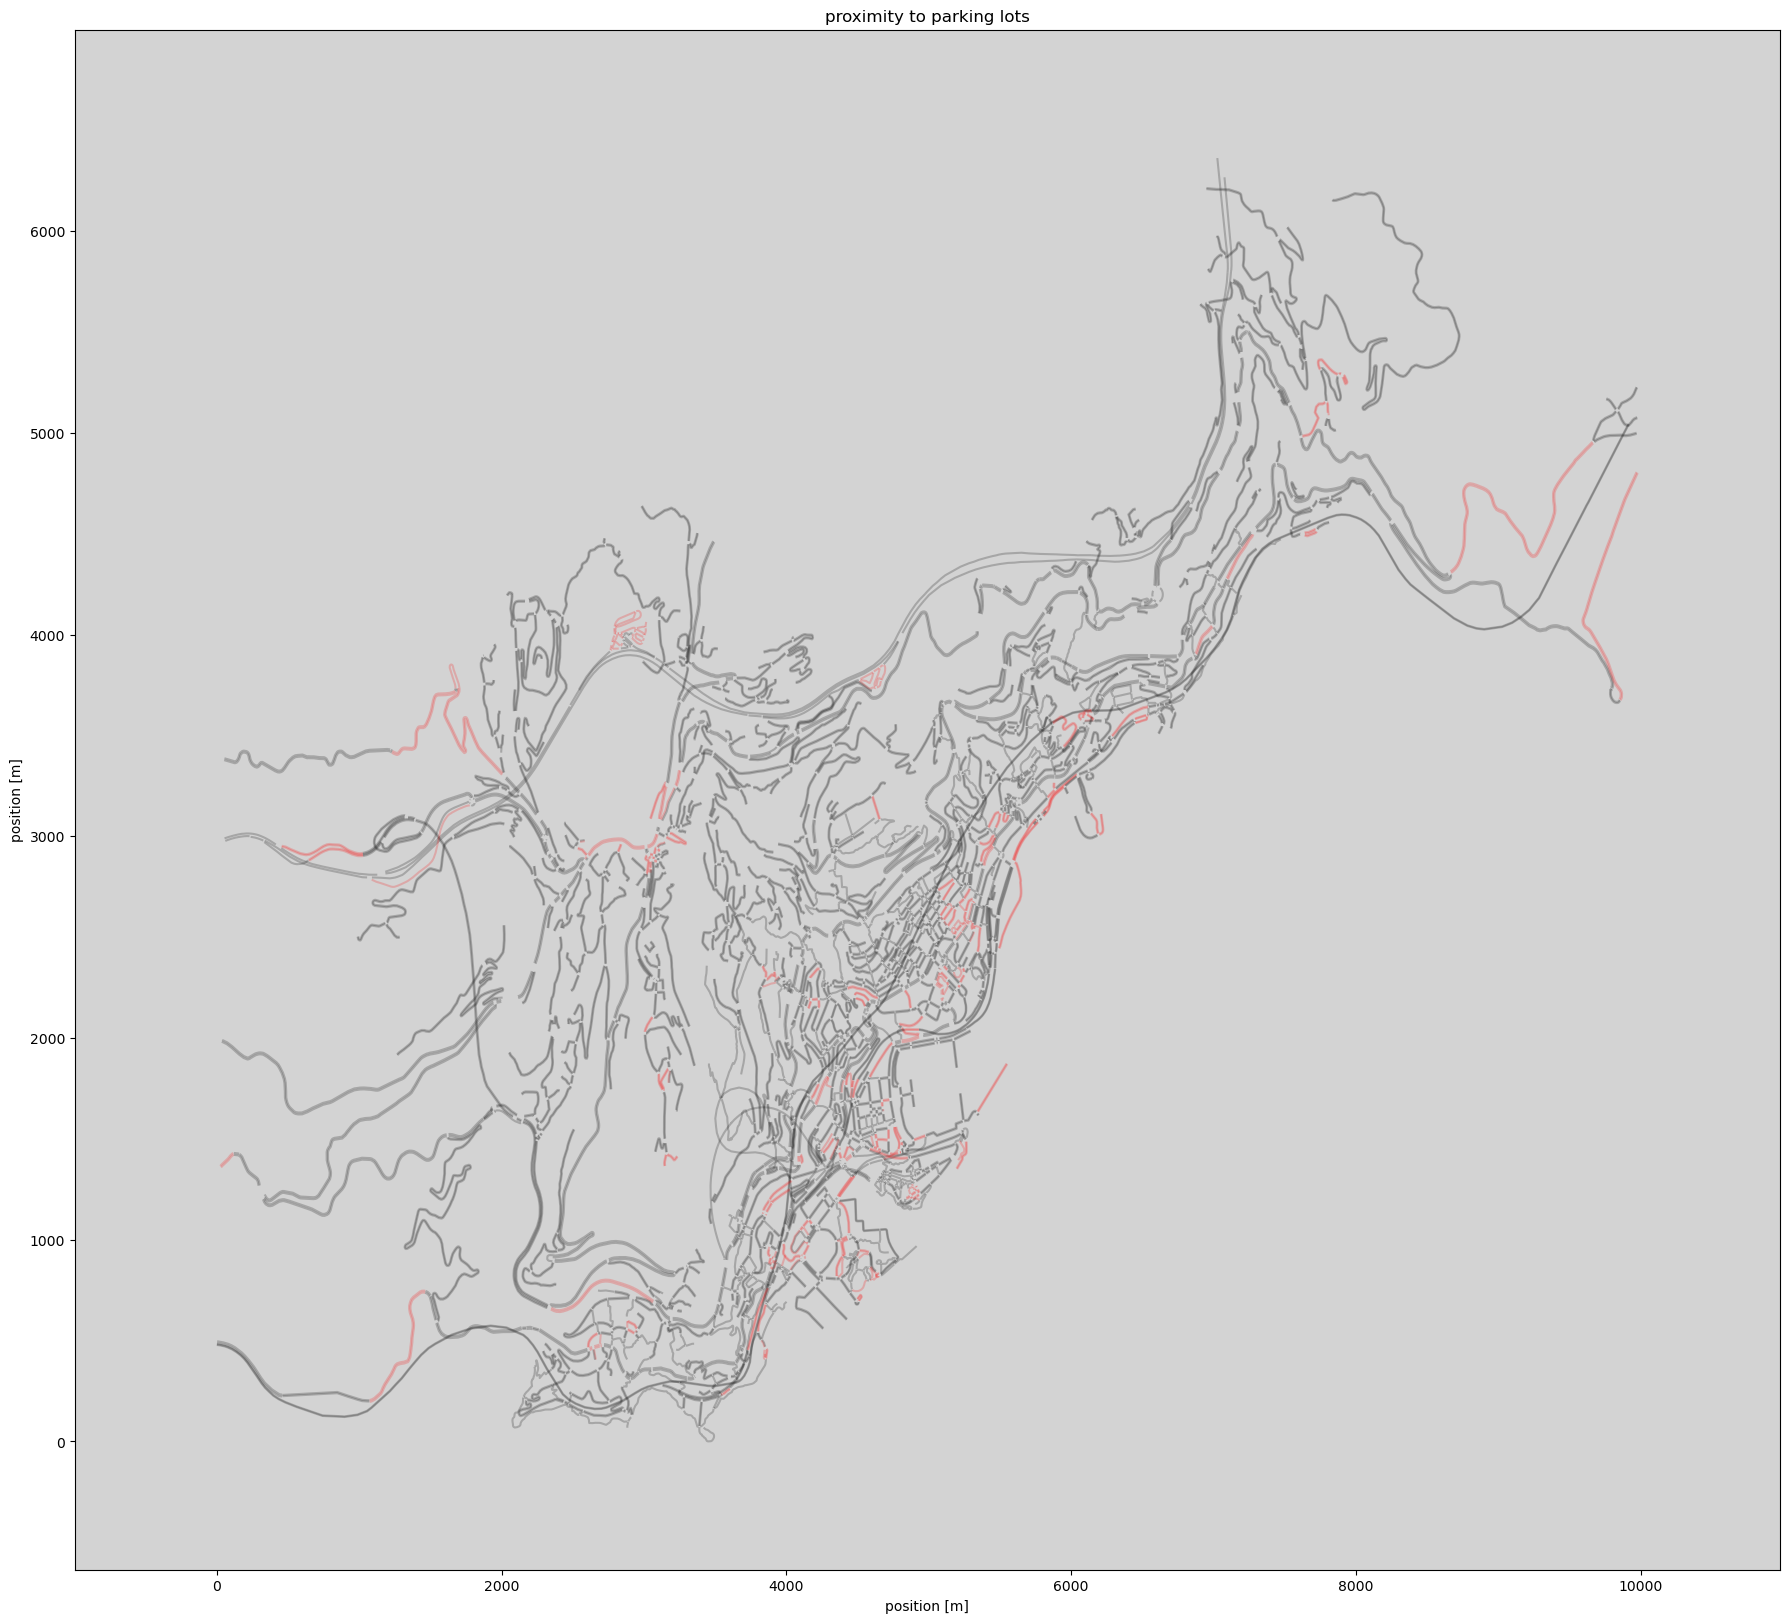

In [42]:
fig, ax = plot_network_probs(net, None, idx_to_edge_map, title="proximity to parking lots",
                             special_edges=proximity_encoded, alpha=0.2)
fig.show()